In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from neo4j import GraphDatabase

uri = "bolt://neo4j:7687"
username = "neo4j"  
password = "adminPass"  


driver = GraphDatabase.driver(uri, auth=(username, password))


In [4]:
# Retrieving Recipes for the "Keto" Diet


with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:APPLICABLE_TO]->(d:Diet)
    WHERE d.name = 'Keto'
    RETURN r.title AS RecipeName, r.description AS RecipeDescription
    """
    
    result = session.run(query)
    
    for record in result:
        print(record["RecipeName"], record["RecipeDescription"])



One Hellava Chipotle Salsa This spicy salsa was created by the Hell's Kitchen Angels for the Salsa Challenge in Zaar World Tour 5.
Gangrene Zombie A great halloween drink.
Avocado With Alfalfa A super-simple, super-healthy and quick appetiser or light lunch dish.  Avocados really are one of those super foods: they lower cholesterol, contain cancer-fighting anti-oxidants and protect the eyes against eye diseases that can lead to blindness.  This simple recipe comes from the September 2005 issue of the Australian magazine 'Delicious'.  Thank you, DeeCooks, for drawing my attention to an omission in the instructions: now corrected!
Mung Chole Ki Dal My sister had noted down this recipe from one of the Indian magazines. I tried it & liked it and would like to share it. It is a different mix of dals.
Heart Smart Collard Greens This is an adaptation of a recipe for collards that I found on the back of a package of Nature's Greens...  I didn't have a smoked turkey wing/ham hock/ or bacon on h

Recipes and their Associated Health Effects:
                                             RecipeName  \
0                           Cauliflower Wings Revisited   
1               Black Bean Burrito Filling or Side Dish   
2                                     Mung Chole Ki Dal   
3                     Cucumber Coconut Milk (Raw Vegan)   
4                     Acorn or Butternut Squash Risotto   
...                                                 ...   
3406                                    Penne Arrabiata   
3407                                  Okra Tomato Salad   
3408        Delicious Creamy Lentils and Chestnuts Soup   
3409  Kimchi/Kimchee/Gimchi (Korean Fermented Spicy ...   
3410                    Grilled Salmon With Mango Salsa   

                                      RecipeDescription           HealthEffect  
0     Cauliflower Wings Revisited is a gluten free a...   Muscle strengthening  
1     A phenomenal amount of flavor and healthy to b...   Muscle strengthening  
2  

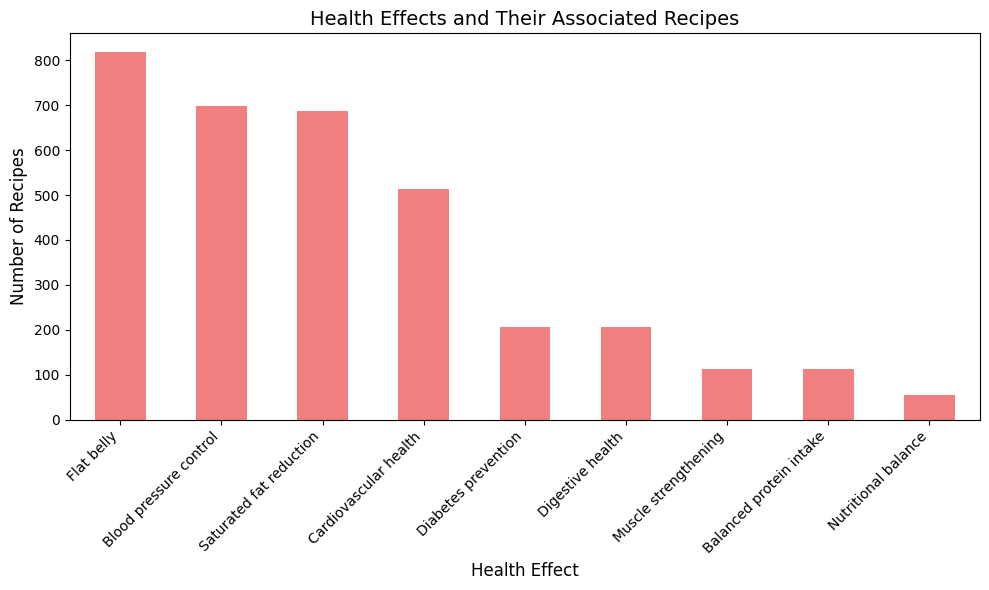

In [5]:
# Visualizing Recipes Associated with Health Effects and Their Frequency


with driver.session() as session:
    
    query = """
    MATCH (r:Recipe)-[:IMPACTS]->(h:HealthEffect)
    WHERE h.name IN ['Muscle strengthening', 'Saturated fat reduction', 'Nutritional balance', 
                     'Digestive health', 'Flat belly', 'Diabetes prevention', 
                     'Blood pressure control', 'Balanced protein intake', 'Cardiovascular health']
    RETURN r.title AS RecipeName, r.description AS RecipeDescription, h.name AS HealthEffect
    """
    
    result = session.run(query)
    
    data = []
    for record in result:
        data.append({
            "RecipeName": record["RecipeName"],
            "RecipeDescription": record["RecipeDescription"],
            "HealthEffect": record["HealthEffect"]
        })
    
    df = pd.DataFrame(data)

print("Recipes and their Associated Health Effects:")
print(df)

health_effect_counts = df['HealthEffect'].value_counts()

plt.figure(figsize=(10, 6))
health_effect_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Health Effect', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
plt.title('Health Effects and Their Associated Recipes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



                    Ingredient  Count
0                    olive oil   1082
1                         salt    885
2                        water    672
3                        onion    644
4                       garlic    634
...                        ...    ...
1709              salmon steak      2
1710      fat free feta cheese      2
1711               lemon grass      1
1712   reduced fat feta cheese      1
1713  montreal steak seasoning      1

[1714 rows x 2 columns]


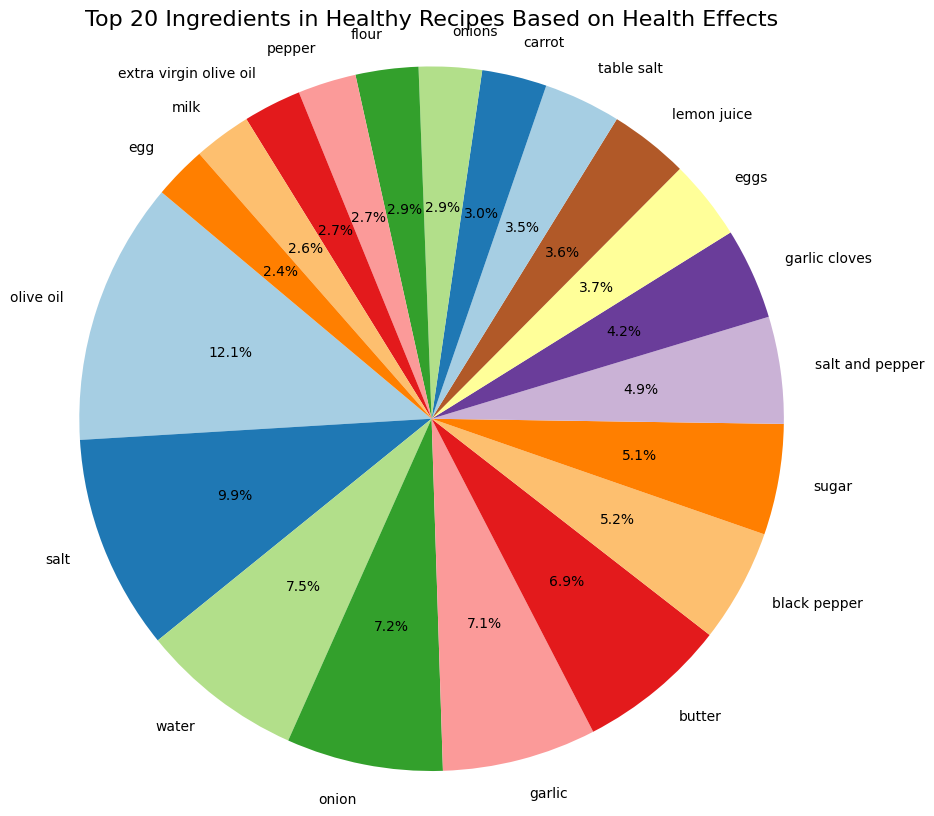

In [6]:
# Top 20 Ingredients in Healthy Recipes Based on Health Effects

with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:IMPACTS]->(h:HealthEffect),
          (r)-[:CONTAINS]->(i:Ingredient)
    WHERE h.name IN ['Muscle strengthening', 'Saturated fat reduction', 'Nutritional balance', 
                     'Digestive health', 'Flat belly', 'Diabetes prevention', 
                     'Blood pressure control', 'Balanced protein intake', 'Cardiovascular health']
    RETURN i.name AS Ingredient, COUNT(i) AS Count
    ORDER BY Count DESC
    """
    
    result = session.run(query)
    
    data = []
    for record in result:
        data.append({
            "Ingredient": record["Ingredient"],
            "Count": record["Count"]
        })
    
    df = pd.DataFrame(data)

print(df)

top_20_df = df.head(20)

plt.figure(figsize=(10, 10))
plt.pie(top_20_df['Count'], labels=top_20_df['Ingredient'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 20 Ingredients in Healthy Recipes Based on Health Effects', fontsize=16)
plt.axis('equal')  
plt.show()


In [7]:


with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:IMPACTS]->(h:HealthEffect)
    RETURN h.name AS HealthEffect, COUNT(r) AS RecipeCount
    ORDER BY RecipeCount DESC
    """
    
    result = session.run(query)
    
    data = []
    for record in result:
        data.append({
            "HealthEffect": record["HealthEffect"],
            "RecipeCount": record["RecipeCount"]
        })
    
    df = pd.DataFrame(data)

print(df)



                     HealthEffect  RecipeCount
0                      Flat belly          819
1                  Weight control          718
2          Blood pressure control          699
3         Saturated fat reduction          688
4           Cardiovascular health          513
5   Enhanced muscle strengthening          212
6             Diabetes prevention          207
7                Digestive health          207
8         Balanced protein intake          112
9            Muscle strengthening          112
10            Nutritional balance           54
11           Carbohydrate balance           50


Top 10 Recipes by Health Effects:
                                        RecipeName  HealthEffectCount
0                                  Penne Arrabiata                 12
1      Delicious Creamy Lentils and Chestnuts Soup                 10
2                                Mung Chole Ki Dal                  9
3                      Barley-Stuffed Bell Peppers                  9
4          Black Bean Burrito Filling or Side Dish                  9
5  Lentil and Rhubarb Curry With Potatoes and Peas                  9
6                Acorn or Butternut Squash Risotto                  9
7                  Rice, Lentil, and Spinach Pilaf                  9
8                     Spinach, Tomato & Orzo Salad                  9
9                  Winter Adzuki Fried Rice Hinged                  9


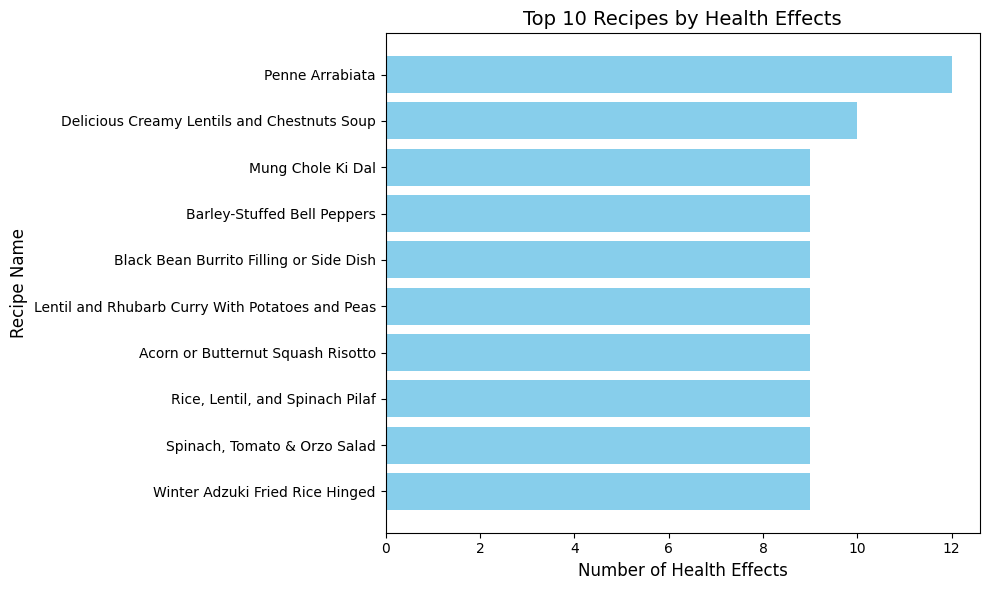

In [8]:
# Top 10 Recipes by Health Effects
with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:IMPACTS]->(h:HealthEffect)
    RETURN r.title AS RecipeName, COUNT(h) AS HealthEffectCount
    ORDER BY HealthEffectCount DESC
    LIMIT 10
    """
    result = session.run(query)
    
    data = []
    for record in result:
        data.append({
            "RecipeName": record["RecipeName"],
            "HealthEffectCount": record["HealthEffectCount"]
        })

df = pd.DataFrame(data)

print("Top 10 Recipes by Health Effects:")
print(df)

plt.figure(figsize=(10, 6))
plt.barh(df['RecipeName'], df['HealthEffectCount'], color='skyblue')
plt.xlabel('Number of Health Effects', fontsize=12)
plt.ylabel('Recipe Name', fontsize=12)
plt.title('Top 10 Recipes by Health Effects', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


driver.close()

In [9]:
# Recipes Applicable to Multiple Diets
with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:APPLICABLE_TO]->(d:Diet)
    WITH r, COUNT(d) AS dietCount
    WHERE dietCount > 1
    RETURN r.title AS RecipeName, dietCount
    ORDER BY dietCount DESC
    """
    result = session.run(query)
    for record in result:
        print(record["RecipeName"], record["dietCount"])


Green Tomato Salad 8
Carrot and Cabbage Salad With Coriander+cumin Dry Rub 8
Watermelon, Zucchini, Carrot Salad 7
Knock-Your-Socks-Off Guacamole 7
Roasted Cauliflower with Tahini Sauce 7
Roasted Sweet Potatoes with Sage 7
Carrot and Coriander Soup 7
Pesto Zucchini Pasta (Whole 30 Approved) 7
Sweet Pepper and Heirloom Tomato Gazpacho 7
Grilled Vegetables 7
Cabbage Stew 7
Vegan Taco bowls with Cilantro Lime Cauliflower Rice 7
Roast Cauliflower Salad with Green Beans and Cherry Tomatoes 7
Garlicky Kale 7
Egyptain Cauliflower Side Salad 7
Baby Bok Choy Stir Fry 7
Roasted Broccoli with Lemon and Garlic 7
Yellow Squash Noodles with Tomato Basil Sauce 7
Okra Tomato Salad 7
Spicy Cauliflower 7
Nasturtium Pesto 7
Basil Tagliatelle with Roasted Red Bell Pepper Salad 7
Seasonal Autumn Stew 7
Garlicky Roasted Kale 7
fennel, Peppers, Lettuce Salad 7
Cauliflower Rice 7
Winter Roasted Vegetables With Balsamic Dressing 6
Fruit and Spinach Salad with "Xocai Activ" Vinaigrette 6
Swiss Chard Wraps 6
Garl

/tmp/ipykernel_908/2482582006.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [10]:
#Health Effects Associated with Keto Diet Recipes

with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:APPLICABLE_TO]->(d:Diet),
          (r)-[:IMPACTS]->(h:HealthEffect)
    WHERE d.name = 'Keto'
    RETURN h.name AS HealthEffect, COUNT(r) AS RecipeCount
    ORDER BY RecipeCount DESC
    """
    result = session.run(query)
    for record in result:
        print(record["HealthEffect"], record["RecipeCount"])


Flat belly 482
Blood pressure control 480
Weight control 477
Saturated fat reduction 428
Cardiovascular health 358
Enhanced muscle strengthening 80
Balanced protein intake 51
Muscle strengthening 51
Digestive health 51
Diabetes prevention 51
Carbohydrate balance 19
Nutritional balance 4


/tmp/ipykernel_908/1055555512.py:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [11]:
#Top 10 Recipes with Multiple Health Effects
with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:IMPACTS]->(h:HealthEffect)
    WITH r, COUNT(DISTINCT h) AS healthEffectCount
    WHERE healthEffectCount > 1
    RETURN r.title AS RecipeName, healthEffectCount
    ORDER BY healthEffectCount DESC
    LIMIT 10
    """
    result = session.run(query)
    for record in result:
        print(record["RecipeName"], record["healthEffectCount"])


Delicious Creamy Lentils and Chestnuts Soup 10
Mango and Black Bean Stew 9
Black Bean Burrito Filling or Side Dish 9
Barley-Stuffed Bell Peppers 9
Mung Chole Ki Dal 9
Lentil and Rhubarb Curry With Potatoes and Peas 9
Acorn or Butternut Squash Risotto 9
Rice, Lentil, and Spinach Pilaf 9
Spinach, Tomato & Orzo Salad 9
Winter Adzuki Fried Rice Hinged 9


/tmp/ipykernel_908/575955927.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [12]:
# Diet Types and Their Associated Health Effects with Recipe Count
with driver.session() as session:
    query = """
    MATCH (r:Recipe)-[:APPLICABLE_TO]->(d:Diet),
          (r)-[:IMPACTS]->(h:HealthEffect)
    RETURN d.name AS Diet, h.name AS HealthEffect, COUNT(r) AS RecipeCount
    ORDER BY RecipeCount DESC
    """
    result = session.run(query)
    for record in result:
        print(record["Diet"], record["HealthEffect"], record["RecipeCount"])


Keto Flat belly 482
Keto Blood pressure control 480
Keto Weight control 477
Vegetarian Flat belly 435
Vegetarian Weight control 434
Vegetarian Blood pressure control 434
Keto Saturated fat reduction 428
Vegetarian Saturated fat reduction 388
Keto Cardiovascular health 358
Vegetarian Cardiovascular health 326
Gluten-Free Flat belly 308
Gluten-Free Blood pressure control 307
Gluten-Free Weight control 306
Gluten-Free Saturated fat reduction 267
Paleo Flat belly 243
Paleo Weight control 242
Paleo Blood pressure control 242
Gluten-Free Cardiovascular health 221
gluten free Flat belly 218
Paleo Saturated fat reduction 215
dairy free Flat belly 199
Paleo Cardiovascular health 188
dairy free Saturated fat reduction 168
gluten free Saturated fat reduction 155
gluten free Weight control 149
lacto ovo vegetarian Flat belly 141
dairy free Weight control 139
gluten free Blood pressure control 131
gluten free Diabetes prevention 126
gluten free Digestive health 126
dairy free Blood pressure control

/tmp/ipykernel_908/3819492207.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:
